In [1]:
import pandas as pd
import numpy as np

import functools
import time
import math


import networkx as nx
import matplotlib.pyplot as plt
import collections

import random 
import networkx as nx
from networkx.utils import powerlaw_sequence

from awalker import randomcell
import awalker as aw

In [5]:
nx.__version__

'2.0'

In [2]:
N = 10
seq = [random.gammavariate(alpha=1,beta=2.4) for i in range(N)]
z_in = [min(N, max( int(round(s)),0 )) for s in seq]
z_in


[3, 5, 5, 1, 5, 4, 2, 0, 1, 1]

In [3]:
G=nx.directed_configuration_model(z_in,z_in) 
G.edges()

OutMultiEdgeDataView([(0, 0), (0, 9), (0, 6), (1, 0), (1, 0), (1, 5), (1, 5), (1, 6), (2, 1), (2, 2), (2, 4), (2, 4), (2, 5), (3, 1), (4, 8), (4, 1), (4, 2), (4, 2), (4, 4), (5, 1), (5, 2), (5, 2), (5, 4), (6, 3), (6, 5), (8, 4), (9, 1)])

In [4]:
N = 500
cell = randomcell.Cell(N)
walk = randomcell.Walk(cell, max_iter=500, ystar=5)

#walk.save("examples/")

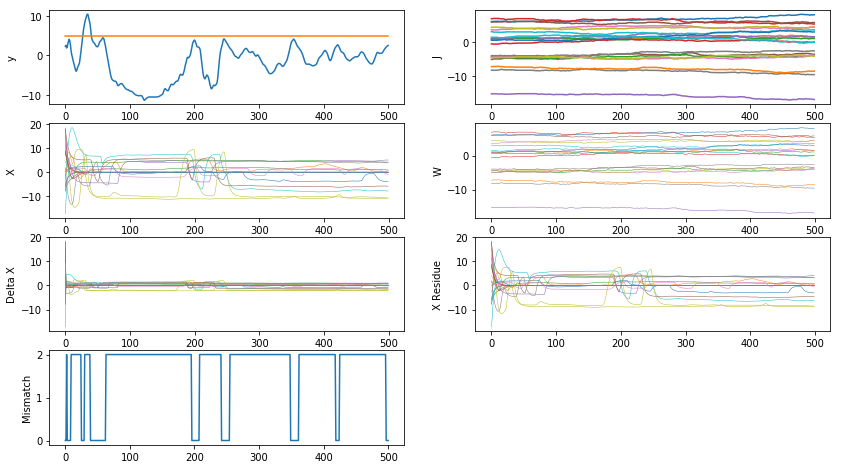

In [5]:
walk.plot(n=20)

In [7]:
N = 500
alphalist = [0.5,1.0, 1.5,1.8]
betalist = [1.5,2.0,2.4,3.0]
for a in alphalist:
    for b in betalist:
        cell = randomcell.Cell(N, alpha=a, beta=b)
        print "a: " + str(a) + "; b: " + str(b) + "; k=" + str(cell.K)
        
#walk = randomcell.Walk(cell, max_iter=500, ystar=5)

a: 0.5; b: 1.5; k=0.734
a: 0.5; b: 2.0; k=0.938
a: 0.5; b: 2.4; k=1.204
a: 0.5; b: 3.0; k=1.32
a: 1.0; b: 1.5; k=1.454
a: 1.0; b: 2.0; k=1.958
a: 1.0; b: 2.4; k=2.394
a: 1.0; b: 3.0; k=3.032
a: 1.5; b: 1.5; k=2.232
a: 1.5; b: 2.0; k=2.972
a: 1.5; b: 2.4; k=3.592
a: 1.5; b: 3.0; k=4.438
a: 1.8; b: 1.5; k=2.586
a: 1.8; b: 2.0; k=3.682
a: 1.8; b: 2.4; k=4.32
a: 1.8; b: 3.0; k=5.284


True


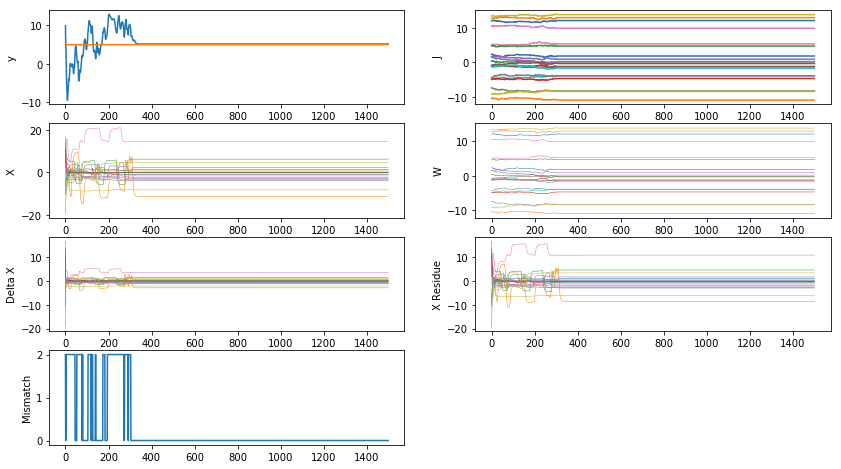

False


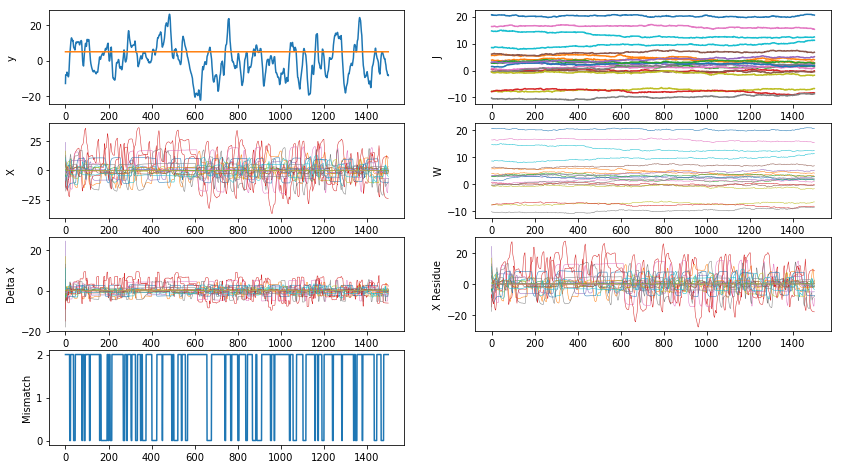

False


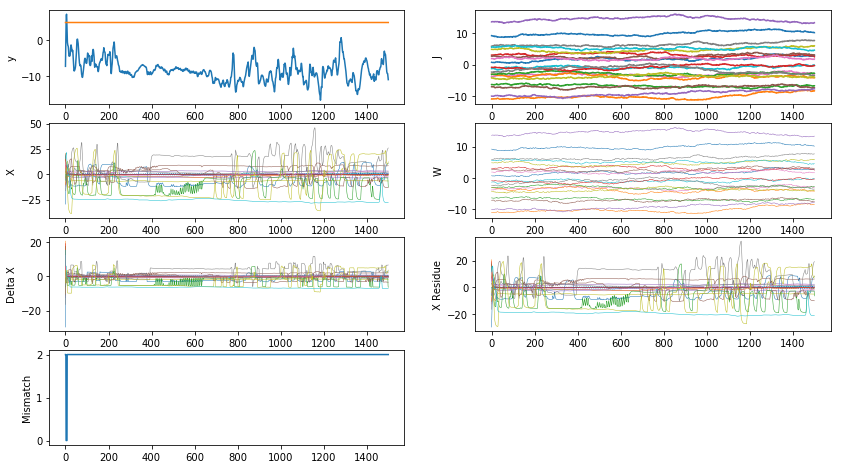

False


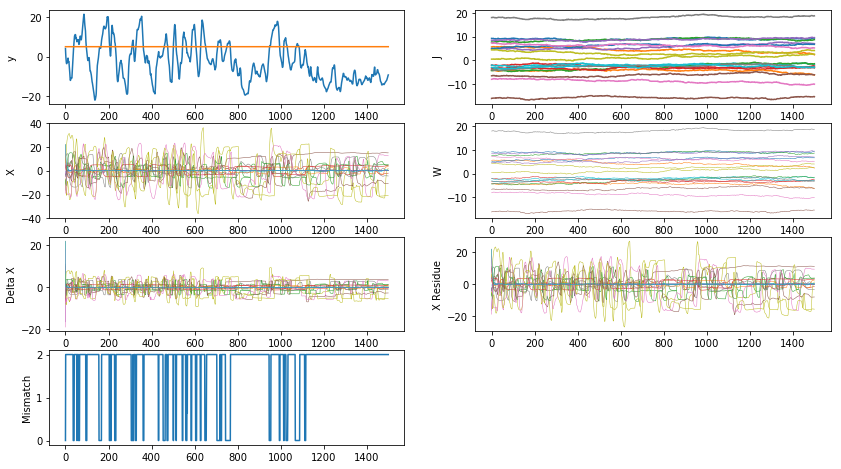

False


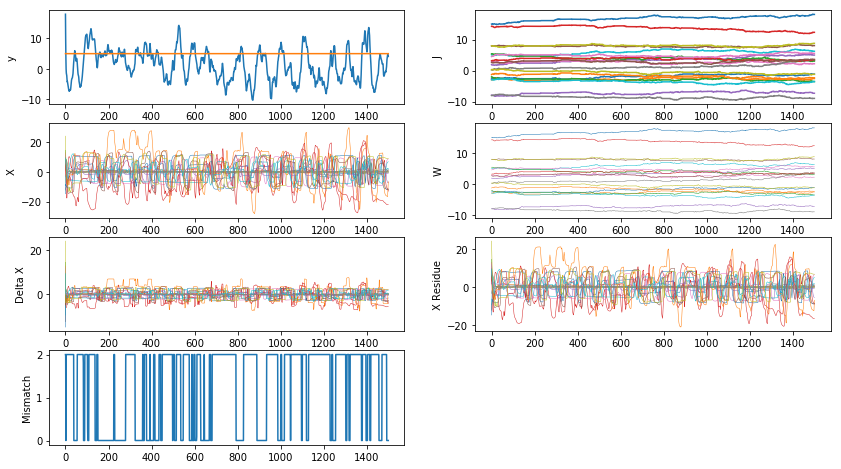

False


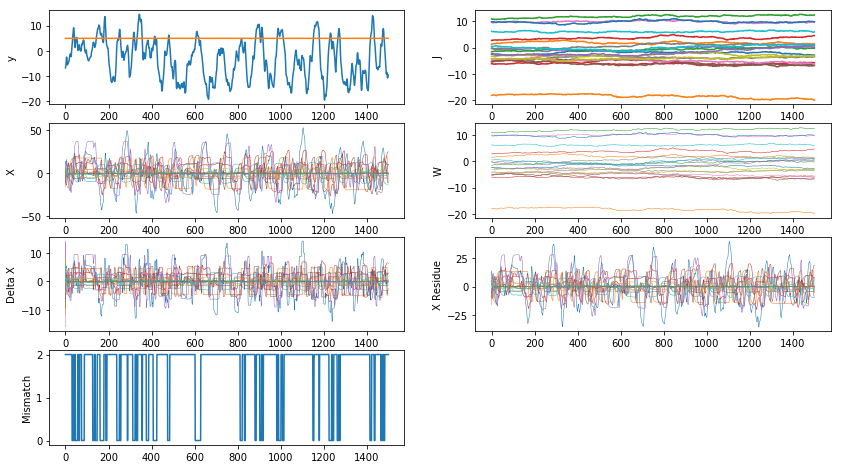

False


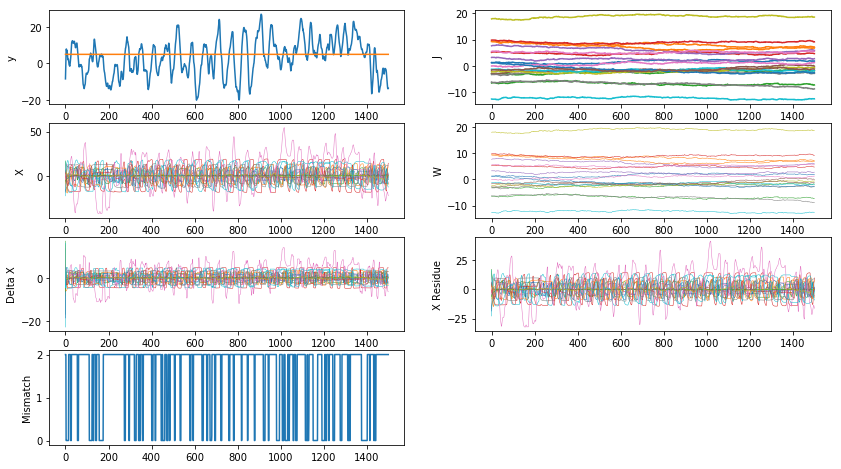

False


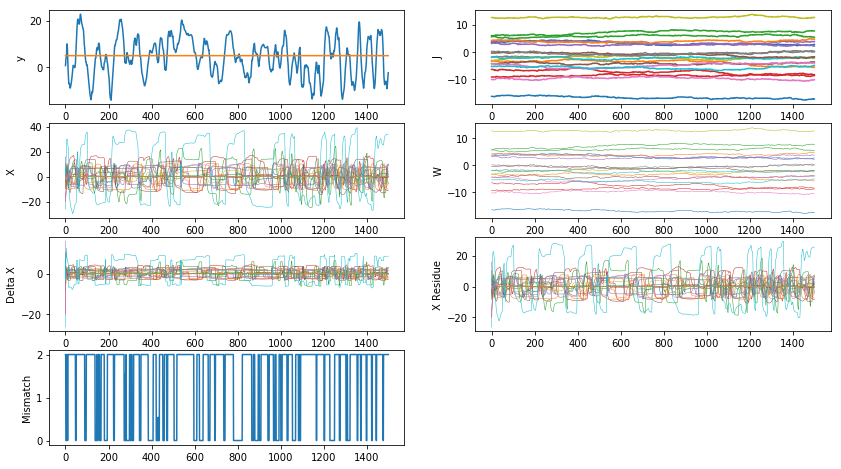

False


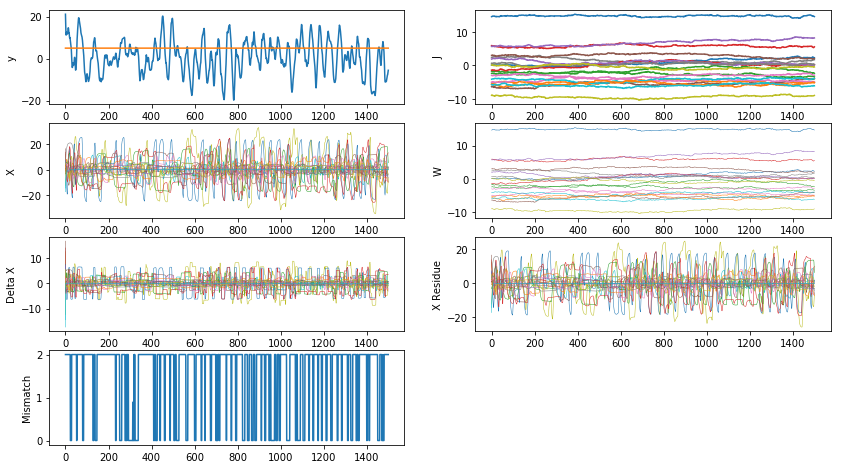

True


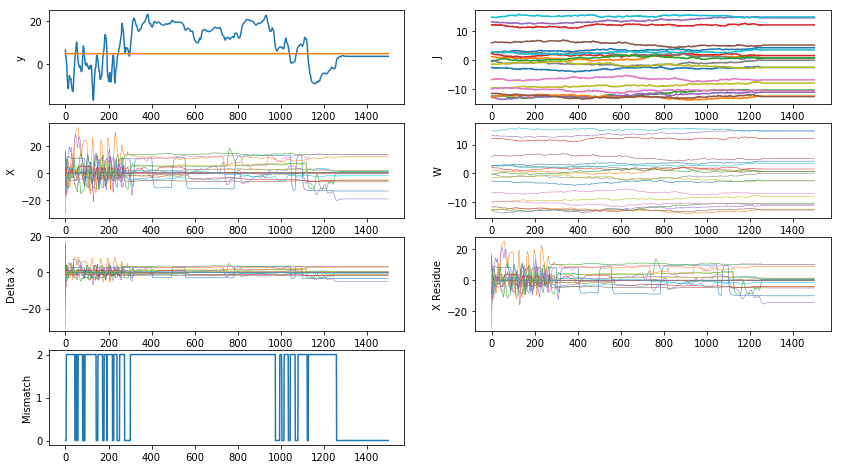

In [18]:
N = 500
#cell = randomcell.Cell(N, alpha = 0.5, beta=1.5)
walk = randomcell.Walk(cell, max_iter=1500, ystar=5)
for i in range(0,10):
    cell = randomcell.Cell(N, alpha = 1.1, beta=2.2)
    #cell = randomcell.Cell(N, alpha = 1.8, beta=3)
    walk = randomcell.Walk(cell, max_iter=1500, ystar=5, deltat=4 )
    print walk.converging
    walk.plot(n=20)

In [ ]:
N = 500
cell = randomcell.Cell(N, alpha = 1.8, beta=3)
walk = randomcell.Walk(cell, max_iter=1500, ystar=5)
walk.plot(n=20)

In [11]:
import pickle
Nlist = [500,1000,1200,1500]
max_iter = 2500
ystarlist = [0,5,10]
deltatlist = [1,2,3,4,4.5,5,5.5,6,7,9,11,13]

convergence = {}
n_runs = 2
for i in range(0,n_runs):
    try:
        for j in range(0,len(Nlist)):
            for d in range(0,len(deltatlist)):
                for y in range(0, len(ystarlist)):
                    cell = randomcell.Cell(Nlist[j])    
                    print "run " + str(i) + " with " + str(Nlist[j]) + " nodes, " + str(max_iter) + " max iterations, " + str(ystarlist[y]) + " ystar, " + str(deltatlist[d]) + " deltat"
                    walk = randomcell.Walk(cell, max_iter=max_iter,
                                           ystar = ystarlist[y],
                                           deltat = deltatlist[d],
                                           save = False)
                    c = walk.converging
                    convergence['run','N','max_iter','ystar','deltat'] = i, Nlist[j], max_iter, ystarlist[y], deltatlist[d]
                    print "converged "+str(c)
    except Exception:
        continue
print convergence

pickle.dump(convergence, open("examples/results.pickle","w"))


run 0 with 500 nodes, 2500 max iterations, 0 ystar, 1 deltat
converged False
run 0 with 500 nodes, 2500 max iterations, 5 ystar, 1 deltat


KeyboardInterrupt: 

In [9]:
convergedlist

[False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False]

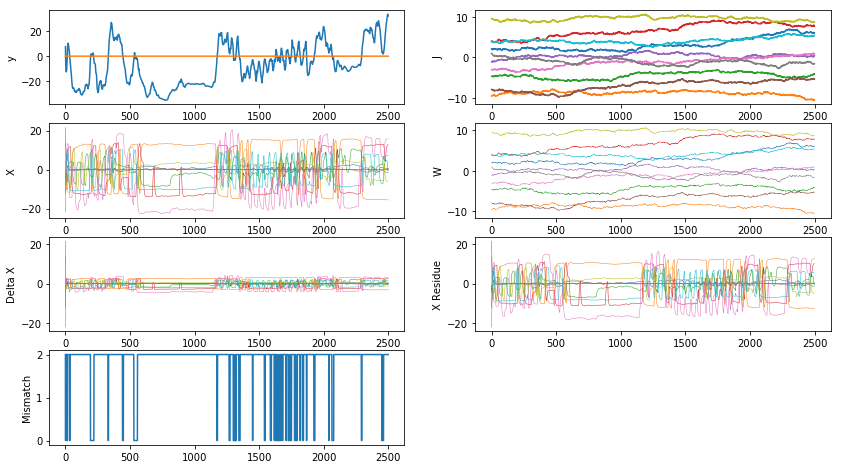

In [4]:
walk.plot(n=10)